## ROC

ROC tells how good or bad a model is with a whole curve rather than a single metric such as precision and recall. 

See [this](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) for definition. In particular TPR tells how good our predictions are with respect to the positive examples, whereas FPR is concerned with our prediction quarlity of the negative examples. 

This is classically formulated for binary classification. We need the following ingredients    
- a machine learning model which models the probability of having class 1 for a given example
- a test set with true labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import accumulate

In [ ]:
m = 500
preds = np.random.uniform(size=(m,)) # this emulates the preds of a learning model
labels = np.random.choice([0,1], size=(m,)) # simualte some grounds truth

## relevant thresholds

ROC computes the pairs of (TPR,FPR) for all possible decision threshold, i.e. the probability value above which a label of 1 will be given.
Notice that the truly useful thresholds are precisely those in the preds. After sorting the 2d array formed by preds and labels wrt the preds, it is clear that any threshold $p\in (p_i,p_{i+1})$ makes no difference as far as TPR and FPR are concerned. Therefore, we only need to compute the TPR-FPR pair for all `thres = preds`. 


In [ ]:
sorted(list(zip(preds,labels)), key=lambda o:o[0], reverse=True)

[(0.9986266397678948, 0),
 (0.9979099583293622, 1),
 (0.9968599673399857, 1),
 (0.9968345333579707, 0),
 (0.9958885283858727, 1),
 (0.9945078130003856, 0),
 (0.9912133547902026, 0),
 (0.9906167576953233, 1),
 (0.9893119728252259, 0),
 (0.9821624530809062, 1),
 (0.9807369516536835, 1),
 (0.9806569672500379, 1),
 (0.9785185046520223, 1),
 (0.9770568537400678, 0),
 (0.9767700197532265, 0),
 (0.9753038368366629, 1),
 (0.973926299621235, 1),
 (0.9698700240053189, 1),
 (0.9681144853401855, 0),
 (0.9619702875629148, 1),
 (0.9610365937590207, 0),
 (0.9579047821978498, 1),
 (0.9573966813310594, 1),
 (0.9573492597910688, 1),
 (0.9566685951641063, 1),
 (0.9555233714722553, 0),
 (0.9540599432605289, 1),
 (0.9462005531037637, 1),
 (0.9376930035808959, 1),
 (0.937514674514697, 1),
 (0.9370895618860832, 1),
 (0.9346135444911009, 0),
 (0.926177983527535, 1),
 (0.9252826748078549, 0),
 (0.924989224020766, 0),
 (0.9235965163771912, 1),
 (0.919986584681451, 0),
 (0.9133124994435096, 0),
 (0.9116154925666

In [ ]:
pairs_sorted=sorted(list(zip(preds,labels)), key=lambda o:o[0], reverse=True)

In [ ]:
s1 = sum(labels)
list(accumulate([l/s1 for p,l in pairs_sorted]))

[0.0,
 0.0038314176245210726,
 0.007662835249042145,
 0.007662835249042145,
 0.011494252873563218,
 0.011494252873563218,
 0.011494252873563218,
 0.01532567049808429,
 0.01532567049808429,
 0.019157088122605363,
 0.022988505747126436,
 0.02681992337164751,
 0.030651340996168584,
 0.030651340996168584,
 0.030651340996168584,
 0.034482758620689655,
 0.038314176245210725,
 0.042145593869731796,
 0.042145593869731796,
 0.045977011494252866,
 0.045977011494252866,
 0.049808429118773936,
 0.05363984674329501,
 0.05747126436781608,
 0.06130268199233715,
 0.06130268199233715,
 0.06513409961685822,
 0.0689655172413793,
 0.07279693486590037,
 0.07662835249042145,
 0.08045977011494253,
 0.08045977011494253,
 0.0842911877394636,
 0.0842911877394636,
 0.0842911877394636,
 0.08812260536398468,
 0.08812260536398468,
 0.08812260536398468,
 0.09195402298850576,
 0.09195402298850576,
 0.09195402298850576,
 0.09195402298850576,
 0.09578544061302684,
 0.09578544061302684,
 0.09578544061302684,
 0.09578544

In [ ]:
s0 = m - s1
list(accumulate([(1-l)/s0 for p,l in pairs_sorted]))

[0.0041841004184100415,
 0.0041841004184100415,
 0.0041841004184100415,
 0.008368200836820083,
 0.008368200836820083,
 0.012552301255230124,
 0.016736401673640166,
 0.016736401673640166,
 0.02092050209205021,
 0.02092050209205021,
 0.02092050209205021,
 0.02092050209205021,
 0.02092050209205021,
 0.02510460251046025,
 0.029288702928870293,
 0.029288702928870293,
 0.029288702928870293,
 0.029288702928870293,
 0.03347280334728033,
 0.03347280334728033,
 0.03765690376569037,
 0.03765690376569037,
 0.03765690376569037,
 0.03765690376569037,
 0.03765690376569037,
 0.04184100418410041,
 0.04184100418410041,
 0.04184100418410041,
 0.04184100418410041,
 0.04184100418410041,
 0.04184100418410041,
 0.04602510460251045,
 0.04602510460251045,
 0.05020920502092049,
 0.054393305439330526,
 0.054393305439330526,
 0.058577405857740565,
 0.06276150627615061,
 0.06276150627615061,
 0.06694560669456065,
 0.07112970711297069,
 0.07531380753138073,
 0.07531380753138073,
 0.07949790794979077,
 0.08368200836

In [ ]:
def roc(preds, labels):
    pairs_sorted=sorted(list(zip(preds,labels)), key=lambda o:o[0], reverse=True)
    s1 = sum(labels)
    TPR = list(accumulate([l/s1 for p,l in pairs_sorted]))
    s0 = m-s1
    FPR = list(accumulate([(1-l)/s0 for p,l in pairs_sorted]))
    return [(0,0)]+list(zip(TPR,FPR))+[(1,1)]

In [ ]:
roc(preds,labels)

[(0, 0),
 (0.0, 0.0041841004184100415),
 (0.0038314176245210726, 0.0041841004184100415),
 (0.007662835249042145, 0.0041841004184100415),
 (0.007662835249042145, 0.008368200836820083),
 (0.011494252873563218, 0.008368200836820083),
 (0.011494252873563218, 0.012552301255230124),
 (0.011494252873563218, 0.016736401673640166),
 (0.01532567049808429, 0.016736401673640166),
 (0.01532567049808429, 0.02092050209205021),
 (0.019157088122605363, 0.02092050209205021),
 (0.022988505747126436, 0.02092050209205021),
 (0.02681992337164751, 0.02092050209205021),
 (0.030651340996168584, 0.02092050209205021),
 (0.030651340996168584, 0.02510460251046025),
 (0.030651340996168584, 0.029288702928870293),
 (0.034482758620689655, 0.029288702928870293),
 (0.038314176245210725, 0.029288702928870293),
 (0.042145593869731796, 0.029288702928870293),
 (0.042145593869731796, 0.03347280334728033),
 (0.045977011494252866, 0.03347280334728033),
 (0.045977011494252866, 0.03765690376569037),
 (0.049808429118773936, 0.037

In [ ]:
x, y = np.array(roc(preds,labels)).T

<matplotlib.collections.PathCollection>

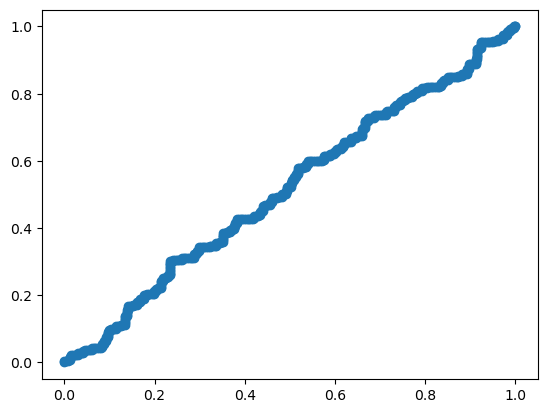

In [ ]:
plt.scatter(x,y)